<a href="https://colab.research.google.com/github/rahulmakwana32/30_Days_Machine_Learning/blob/main/EasyVisa_fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>Advanced Machine Learning - Project Debrief</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [35]:
!python3 -m venv venv

!source venv/bin/activate

!pip3 install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

Error: Command '['/content/venv/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.
/bin/bash: line 1: venv/bin/activate: No such file or directory


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb


## Import Dataset

In [37]:
df =pd.read_csv('EasyVisa_reduced_further.csv')

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [38]:
df.head()
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
7640,EZYV6909,South America,Master's,Y,N,3623,1838,Northeast,14104.70,Year,Y,Certified
7641,EZYV3762,South America,Master's,N,N,5973,2007,Northeast,53263.14,Year,Y,Denied
7642,EZYV2359,South America,Bachelor's,N,N,1380,2008,West,41558.42,Year,Y,Denied
7643,EZYV4761,South America,Master's,N,N,287,1932,West,37760.10,Year,Y,Denied
7644,EZYV4724,South America,Master's,N,Y,17794,2005,South,33368.09,Year,Y,Certified


#### Understand the shape of the dataset

In [39]:
df.shape

(7645, 12)

#### Check the data types of the columns for the dataset

In [40]:
df.dtypes

,0
case_id,object
continent,object
education_of_employee,object
has_job_experience,object
requires_job_training,object
no_of_employees,int64
yr_of_estab,int64
region_of_employment,object
prevailing_wage,float64
unit_of_wage,object


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [41]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,7645.000000,7645.000000,7645.000000
mean,5757.427469,1979.522564,74408.000800
std,22100.305751,42.534976,52889.860878
min,-26.000000,1800.000000,3.318800
25%,1041.000000,1976.000000,34399.850000
50%,2123.000000,1997.000000,69551.200000
75%,3518.000000,2005.000000,107861.360000
max,602069.000000,2016.000000,306982.280000


#### Fixing the negative values in number of employees columns

In [42]:
#calculating mean value by excluding negative value
mean_value = int(df.loc[df['no_of_employees'] >= 0, 'no_of_employees'].mean())

#Setting value to mean value where value is nrgative
df.loc[df['no_of_employees'] < 0, 'no_of_employees'] = mean_value


#### Let's check the count of each unique category in each of the categorical variables

In [43]:
categorical_cols = df.select_dtypes(include=['object', 'category', 'int64']).columns

for col in categorical_cols:
    if df[col].nunique() < 20:    #Considering column with less distinct values
        print(f"\nColumn: {col}")
        print(df[col].value_counts())


Column: continent
Asia             5058
Europe           1120
North America     988
South America     256
Africa            165
Oceania            58
Name: continent, dtype: int64

Column: education_of_employee
Bachelor's     3055
Master's       2866
High School    1039
Doctorate       685
Name: education_of_employee, dtype: int64

Column: has_job_experience
Y    4449
N    3196
Name: has_job_experience, dtype: int64

Column: requires_job_training
N    6746
Y     899
Name: requires_job_training, dtype: int64

Column: region_of_employment
Northeast    2143
South        2113
West         1981
Midwest      1292
Island        116
Name: region_of_employment, dtype: int64

Column: unit_of_wage
Year     6902
Hour      630
Week       89
Month      24
Name: unit_of_wage, dtype: int64

Column: full_time_position
Y    6869
N     776
Name: full_time_position, dtype: int64

Column: case_status
Certified    5075
Denied       2570
Name: case_status, dtype: int64


### Univariate Analysis

In [44]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [45]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

<ipython-input-45-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


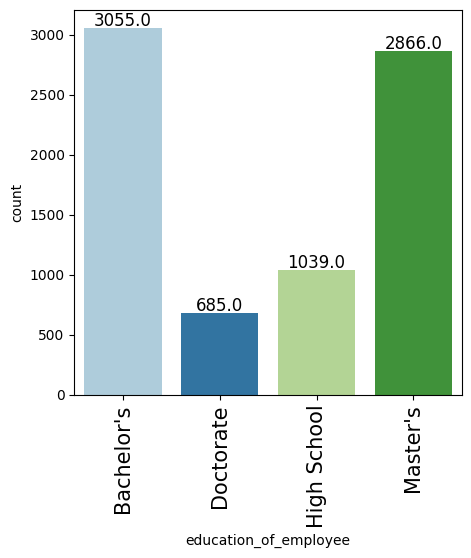

In [46]:
labeled_barplot(df, 'education_of_employee')

##### Above we could see number of applicants are majorly Bachelors and Masters

#### Observations on region of employment

<ipython-input-45-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


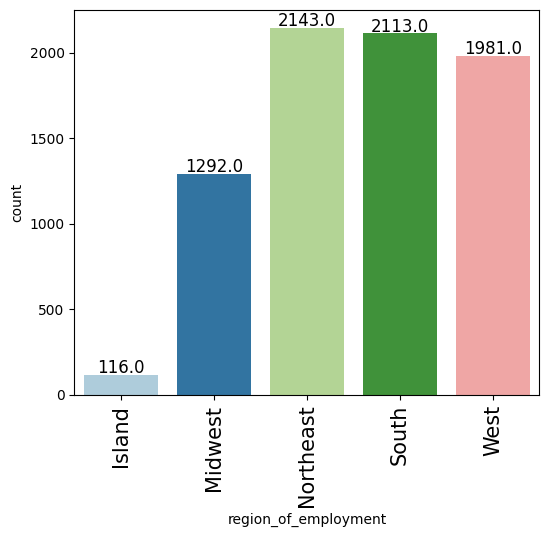

In [47]:
labeled_barplot(df, 'region_of_employment')

##### Above we could most of the employers are from North east and South


#### Observations on job experience

<ipython-input-45-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


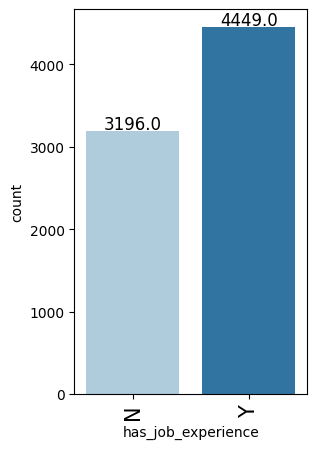

In [48]:
labeled_barplot(df, 'has_job_experience')

##### Distribution of Job Experience:

1. Has Experience (Y): 14,802 cases (58.1% of total cases)
2. No Experience (N): 10,678 cases (41.9% of total cases)
3. This shows that the majority of applicants have prior job experience.




#### Observations on case status

<ipython-input-45-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


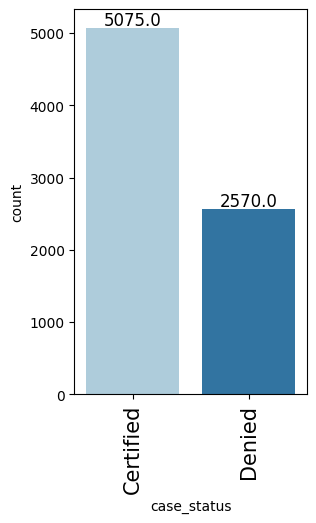

In [49]:
labeled_barplot(df,'case_status')


1.Certified: 17,018 cases (66.8% of total cases)

2.Denied: 8,462 cases (33.2% of total cases)


3.This shows that Certified cases are twice as common as Denied cases.

#Lets check on Numerical Data values

In [50]:
# Selecting only numerical columns
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
print(numerical_features)


Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')


Analyzing no_of_employees...
Analyzing yr_of_estab...
Analyzing prevailing_wage...


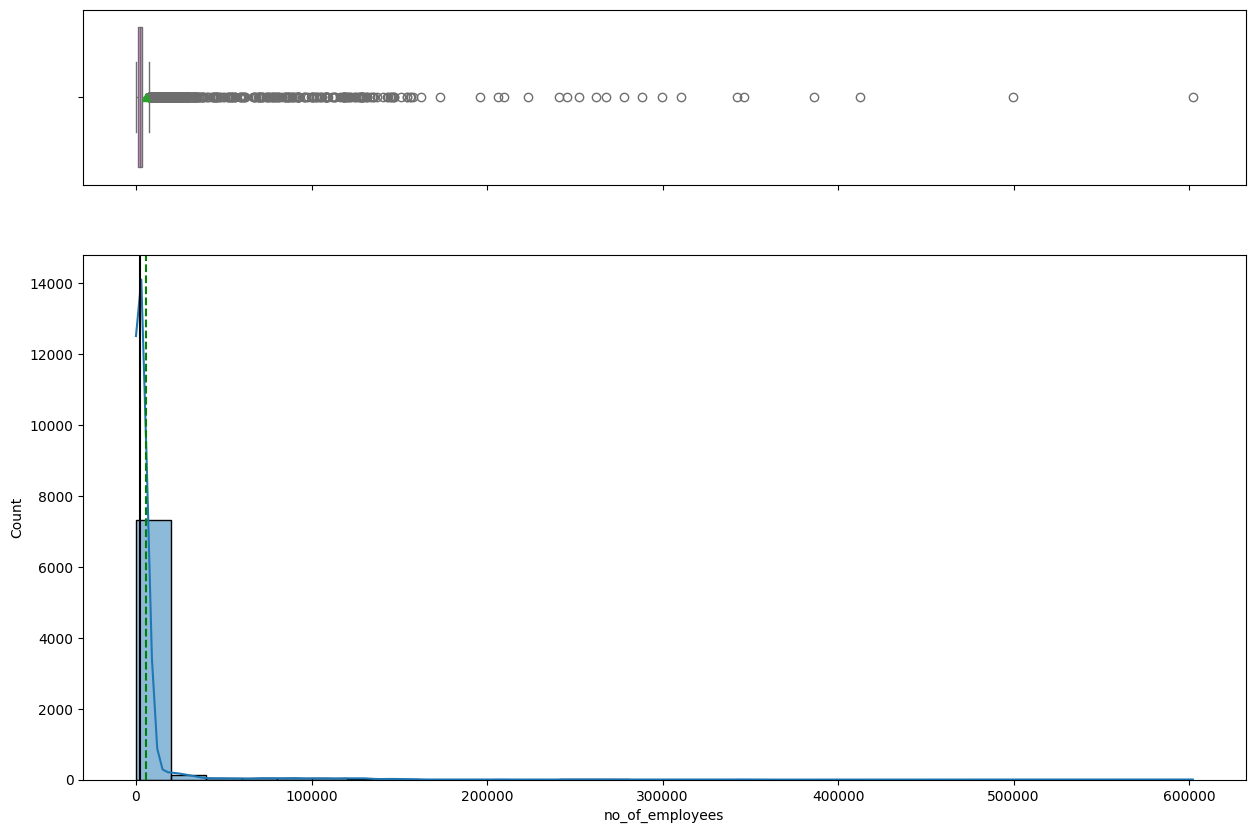

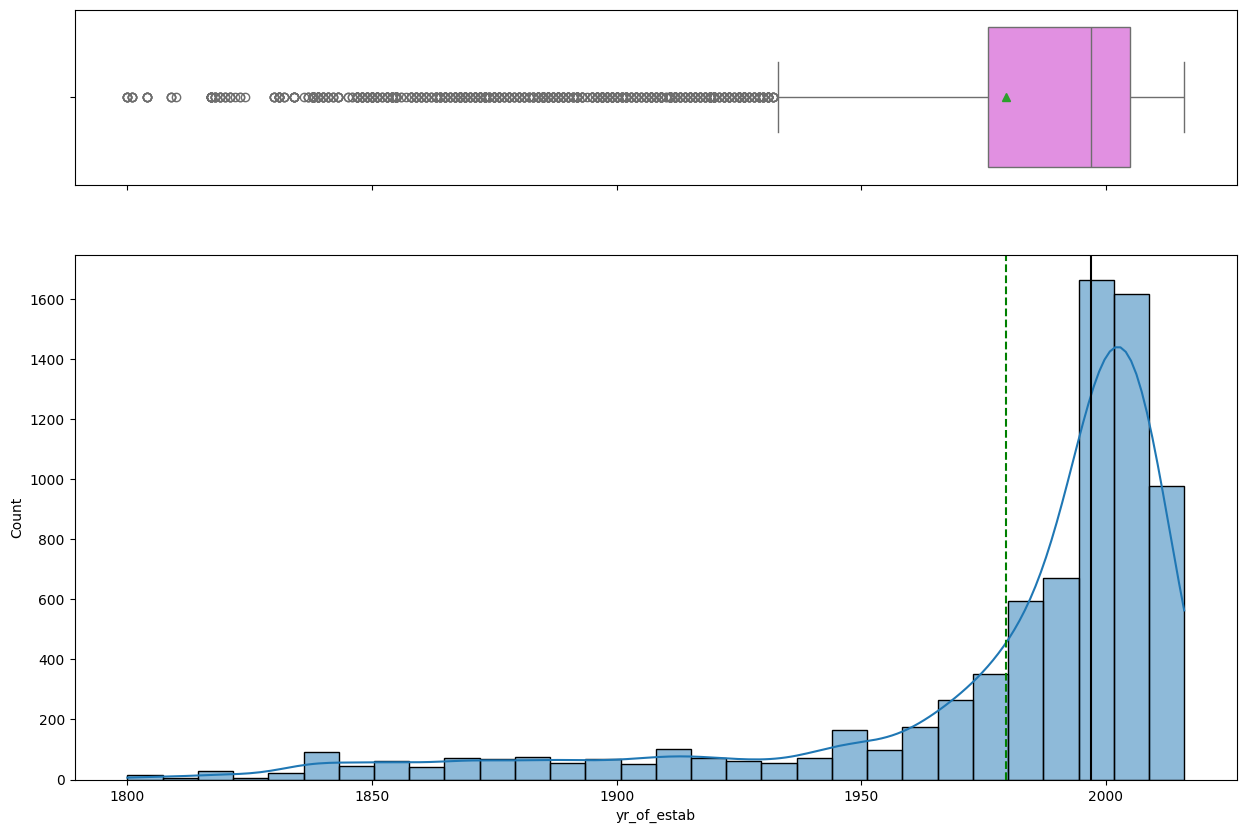

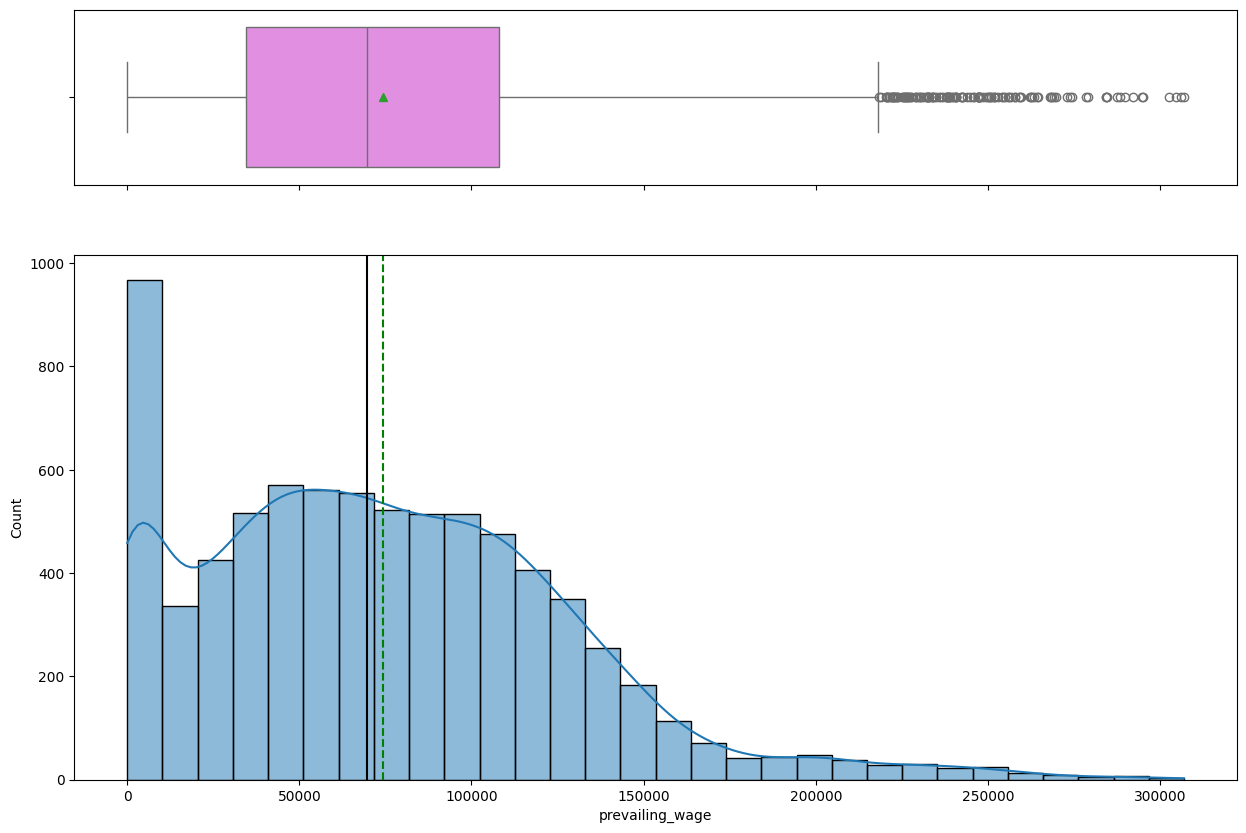

In [51]:
for col in numerical_features:
    print(f"Analyzing {col}...")
    histogram_boxplot(df, col, kde=True, bins=30)


#Observations from Histogram & Boxplots


**no_of_employees (Number of Employees)**

1. The distribution is highly right-skewed, meaning a few companies have an extremely large workforce.

2. Most companies have fewer than 10,000 employees, while a few have over 500,000.

**yr_of_estab (Year of Establishment)**

1. The distribution shows a bimodal pattern, with peaks around 1900-1950 and 2000-2010.
Some values are unrealistic (e.g., 1800), indicating potential data entry errors.

2. The median is around 1997, meaning many companies were established in the last 30 years.


**prevailing_wage (Salary Offered)**



1.   The wage distribution is right-skewed, with a few very high salaries.
2.   Most salaries range between 30,000  and 110,000, with a median of around $70,000.





### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [52]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [53]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied   All
education_of_employee                         
All                         5075    2570  7645
Bachelor's                  1907    1148  3055
High School                  335     704  1039
Master's                    2236     630  2866
Doctorate                    597      88   685
------------------------------------------------------------------------------------------------------------------------


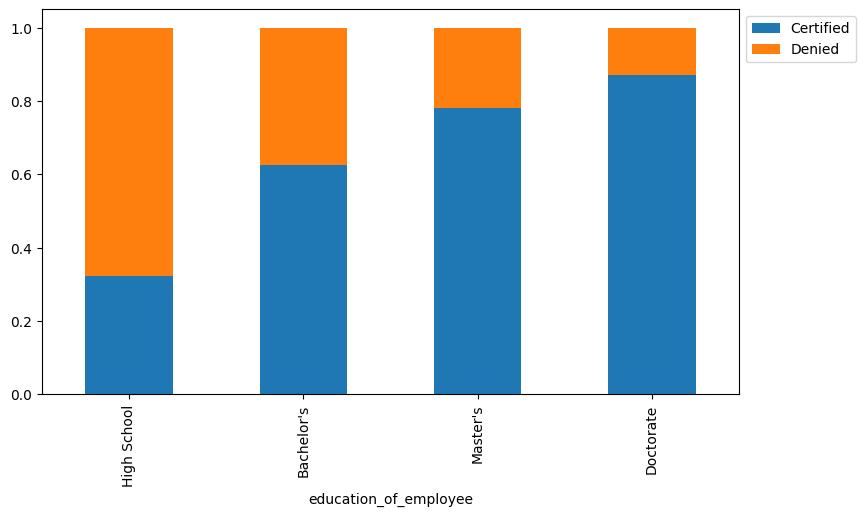

In [54]:
stacked_barplot(df, 'education_of_employee', 'case_status')


**Higher education increases visa approval chances:**

1.Doctorate holders have the highest approval rate with 1912 approvals vs. 280 denials.
Master's degree holders also have a high approval rate (7575 certified vs. 2059 denied).
Lower education levels face more denials:

2.High School graduates have a much lower approval rate (1164 certified vs. 2256 denied).
This suggests that visa applications with lower education levels are more likely to be rejected.
Bachelor’s degree holders have a mixed outcome:

3.They are more evenly split between approvals (6367) and denials (3867).
This might indicate that other factors like experience, job role, or salary influence approvals.

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied   All
continent                             
All                 5075    2570  7645
Asia                3282    1776  5058
North America        593     395   988
Europe               893     227  1120
South America        147     109   256
Africa               122      43   165
Oceania               38      20    58
------------------------------------------------------------------------------------------------------------------------


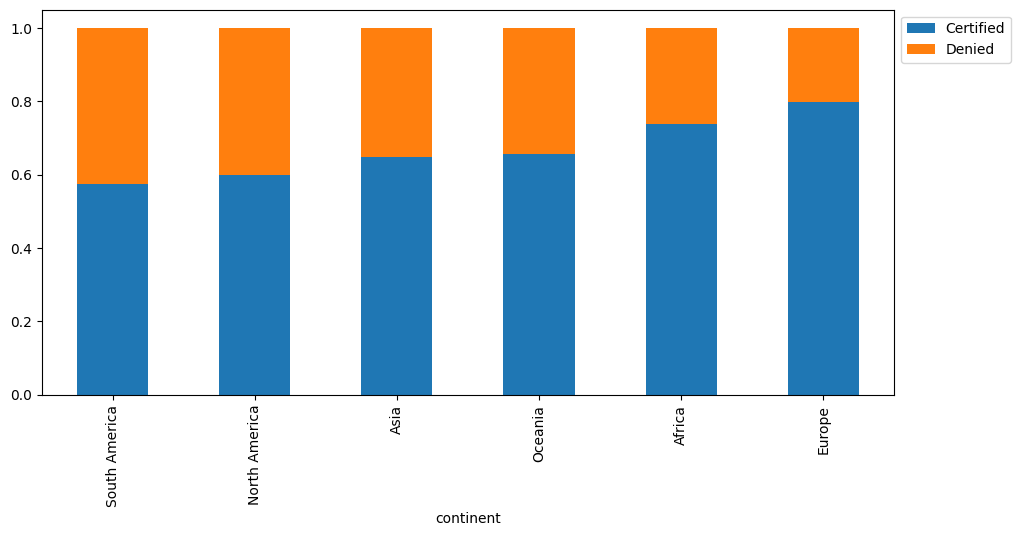

In [55]:
stacked_barplot(df, 'continent', 'case_status')

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied   All
has_job_experience                         
All                      5075    2570  7645
N                        1773    1423  3196
Y                        3302    1147  4449
------------------------------------------------------------------------------------------------------------------------


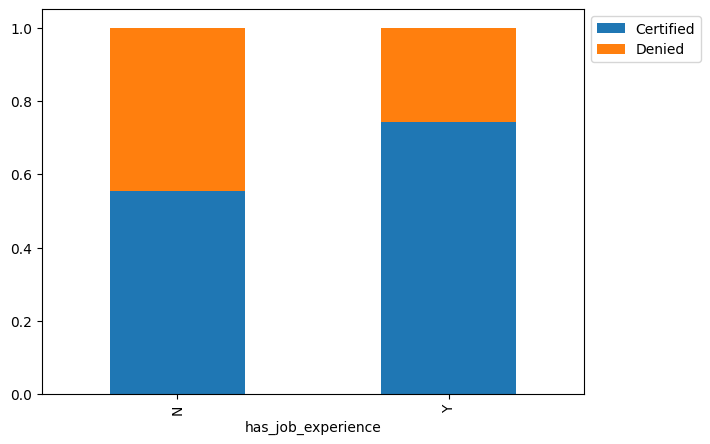

In [56]:
stacked_barplot(df, 'has_job_experience', 'case_status')

#### Checking if the prevailing wage is similar

---

across all the regions of the US

In [57]:
df.groupby('region_of_employment')['prevailing_wage'].mean()

,prevailing_wage
region_of_employment,
Island,88586.777547
Midwest,92027.984305
Northeast,67529.173559
South,75446.455431
West,68419.770284


#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

In [58]:
df.groupby('case_status')['prevailing_wage'].mean()

,prevailing_wage
case_status,
Certified,76929.013595
Denied,69429.736232


#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

In [59]:
df.groupby('unit_of_wage')['prevailing_wage'].mean()

,prevailing_wage
unit_of_wage,
Hour,425.120131
Month,93030.504167
Week,84631.301236
Year,80964.419374


## Data Pre-processing

### Outlier Check

In [60]:
#This section is completed and observation as paort of previous section

### Data Preparation for modeling

In [61]:
# Convert "case_status" to binary(category) (1 for "Certified", 0 otherwise)
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

# Separate features (X) and target variable (y)
X = df.drop(columns=["case_status"])
y = df["case_status"]

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training (70%) and validation (30%) sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Further split the validation set into validation (90%) and test (10%) sets
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, test_size=1/9, random_state=1, stratify=y_val
)

In [62]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (5351, 7673)
Shape of Validation set :  (2039, 7673)
Shape of test set :  (255, 7673)
Percentage of classes in training set:
1    0.663801
0    0.336199
Name: case_status, dtype: float64
Percentage of classes in validation set:
1    0.664051
0    0.335949
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.662745
0    0.337255
Name: case_status, dtype: float64


## Model Building

### Model Evaluation Criterion


#Below are the Criteria we should evaluate model.


1.   **Recall** : Missing a qualified applicant (False Negative) is a bigger issue than wrongly approving an unqualified one.
2.   **Precision**: Helps reduce false approvals (which could lead to visa rejections later).
3. **F1-score** :Useful if we want to minimize both false rejections and false approvals and balance both.
4. **ROC-AUC** Since we will be using multiple models having this core will help model's ability to differentiate between Certified and Denied cases.



In [63]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)
    roc_auc = roc_auc_score(target, pred)  # to compute ROC AUC score
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Recall": recall, "Precision": precision, "F1": f1, "ROC_AUC": roc_auc,},
        index=[0],
    )

    return df_perf

In [64]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning



**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier ,GradientBoostingClassifier


# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Initialize a dictionary to store the results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    print(f"Building model {model_name}");
    model.fit(X_train, y_train)

    # Get the predictions on the training and testing sets
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Evaluate the model's performance
    train_performance = model_performance_classification_sklearn(model, X_train, y_train)
    test_performance = model_performance_classification_sklearn(model, X_test, y_test)

    # Store the results
    results[model_name] = {
        'train': train_performance,
        'test': test_performance
    }

# Display the results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print("Training Performance:")
    print(result['train'])
    print("\nTesting Performance:")
    print(result['test'])
    print("-" * 20)

Building model Random Forest
Building model AdaBoost


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Building model Gradient Boosting
Building model XGBoost
Model: Random Forest
Training Performance:
   Recall  Precision   F1  ROC_AUC
0     1.0        1.0  1.0      1.0

Testing Performance:
    Recall  Precision        F1  ROC_AUC
0  0.87574   0.774869  0.822222  0.68787
--------------------
Model: AdaBoost
Training Performance:
     Recall  Precision        F1   ROC_AUC
0  0.885417   0.768949  0.823083  0.680062

Testing Performance:
     Recall  Precision        F1   ROC_AUC
0  0.881657   0.780105  0.827778  0.696642
--------------------
Model: Gradient Boosting
Training Performance:
     Recall  Precision        F1   ROC_AUC
0  0.892455   0.774682  0.829409  0.689974

Testing Performance:
     Recall  Precision        F1   ROC_AUC
0  0.869822   0.786096  0.825843  0.702353
--------------------
Model: XGBoost
Training Performance:
     Recall  Precision        F1   ROC_AUC
0  0.975507   0.927711  0.951009  0.912712

Testing Performance:
     Recall  Precision        F1   ROC_AUC
0  

**Random Forest:** Showed signs of overfitting, with excellent training performance but significantly lower accuracy on the testing data. This suggests the model is not generalizing well to unseen data.

**AdaBoost:** Demonstrated a good balance between training and testing performance, indicating good generalization. It achieved high Recall, effectively identifying true 'Certified' cases, but had slightly lower Precision and ROC AUC compared to Gradient Boosting.

**Gradient Boosting:** Achieved the best overall testing performance with the highest ROC AUC score and a good balance of Recall and Precision. This suggests it's a strong candidate for this prediction task.

**XGBoost:**
Showed promising potential with a high training ROC AUC score, but its testing performance was slightly lower than Gradient Boosting. Further hyperparameter tuning could potentially improve its performance.

### Model Building with oversampled data

#####Oversampling using SMOTE willhelp  to balance the class distribution by generating synthetic samples for the minority class. This involves creating new instances that are similar to the existing 'Certified' cases, thereby increasing the representation of the minority class in the training data.

In [66]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)



# Apply SMOTE to the training data
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Initialize a dictionary to store the results
results_oversampled = {}

# Train and evaluate each model on the oversampled data
for model_name, model in models.items():
    # Train the model on the oversampled data
    model.fit(X_train_oversampled, y_train_oversampled)

    # Get the predictions on the training and testing sets
    train_pred = model.predict(X_train_oversampled)
    test_pred = model.predict(X_test)

    # Evaluate the model's performance
    train_performance = model_performance_classification_sklearn(model, X_train_oversampled, y_train_oversampled)
    test_performance = model_performance_classification_sklearn(model, X_test, y_test)

    # Store the results
    results_oversampled[model_name] = {
        'train': train_performance,
        'test': test_performance
    }

# Display the results
for model_name, result in results_oversampled.items():
    print(f"Model: {model_name}")
    print("Training Performance (Oversampled Data):")
    print(result['train'])
    print("\nTesting Performance (Original Data):")
    print(result['test'])
    print("-" * 20)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: Random Forest
Training Performance (Oversampled Data):
   Recall  Precision   F1  ROC_AUC
0     1.0        1.0  1.0      1.0

Testing Performance (Original Data):
     Recall  Precision        F1   ROC_AUC
0  0.816568   0.811765  0.814159  0.722238
--------------------
Model: AdaBoost
Training Performance (Oversampled Data):
     Recall  Precision        F1   ROC_AUC
0  0.865146   0.763478  0.811139  0.798564

Testing Performance (Original Data):
     Recall  Precision        F1   ROC_AUC
0  0.852071   0.778378  0.813559  0.687663
--------------------
Model: Gradient Boosting
Training Performance (Oversampled Data):
     Recall  Precision        F1   ROC_AUC
0  0.835304   0.794165  0.814215  0.809403

Testing Performance (Original Data):
     Recall  Precision        F1   ROC_AUC
0  0.828402   0.823529  0.825959  0.739783
--------------------
Model: XGBoost
Training Performance (Oversampled Data):
     Recall  Precision        F1   ROC_AUC
0  0.964809   0.929734  0.946947  0.945

###All models showed good performance after SMOTE oversampling, with Random Forest potentially overfitting and AdaBoost and Gradient Boosting demonstrating a good balance between training and testing performance. XGBoost performed well but with slightly lower accuracy. Further fine-tuning could improve overall results.

### Model Building with undersampled data

In [67]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply RandomUnderSampler to the training data
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Initialize a dictionary to store the results
results_undersampled = {}

# Train and evaluate each model on the undersampled data
for model_name, model in models.items():
    # Train the model on the undersampled data
    model.fit(X_train_undersampled, y_train_undersampled)

    # Get the predictions on the training and testing sets
    train_pred = model.predict(X_train_undersampled)
    test_pred = model.predict(X_test)

    # Evaluate the model's performance
    train_performance = model_performance_classification_sklearn(model, X_train_undersampled, y_train_undersampled)
    test_performance = model_performance_classification_sklearn(model, X_test, y_test)

    # Store the results
    results_undersampled[model_name] = {
        'train': train_performance,
        'test': test_performance
    }

# Display the results
for model_name, result in results_undersampled.items():
    print(f"Model: {model_name}")
    print("Training Performance (Undersampled Data):")
    print(result['train'])
    print("\nTesting Performance (Original Data):")
    print(result['test'])
    print("-" * 20)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: Random Forest
Training Performance (Undersampled Data):
   Recall  Precision   F1  ROC_AUC
0     1.0        1.0  1.0      1.0

Testing Performance (Original Data):
     Recall  Precision        F1   ROC_AUC
0  0.674556   0.863636  0.757475  0.732627
--------------------
Model: AdaBoost
Training Performance (Undersampled Data):
     Recall  Precision        F1   ROC_AUC
0  0.739855   0.708356  0.723763  0.717621

Testing Performance (Original Data):
     Recall  Precision        F1   ROC_AUC
0  0.715976   0.823129  0.765823  0.706825
--------------------
Model: Gradient Boosting
Training Performance (Undersampled Data):
     Recall  Precision        F1   ROC_AUC
0  0.758755   0.710198  0.733674  0.724569

Testing Performance (Original Data):
     Recall  Precision        F1   ROC_AUC
0  0.733728   0.826667  0.777429  0.715701
--------------------
Model: XGBoost
Training Performance (Undersampled Data):
     Recall  Precision        F1   ROC_AUC
0  0.959978   0.961581  0.960779  0

###Undersampling appears to have negatively impacted model performance, particularly for Random Forest and XGBoost, which show signs of underfitting. AdaBoost and Gradient Boosting demonstrate a better balance between training and testing performance, with decent recall and precision. Overall, undersampling may not be the ideal strategy in this case, and alternative approaches like oversampling or cost-sensitive learning might be more suitable.

## Hyperparameter Tuning

### Tuning AdaBoost using oversampled data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Assuming you have X_train, y_train, X_test, y_test defined

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Initialize AdaBoost with hyperparameters
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_params = {
    'n_estimators': [50, 100, 200],  # Example values, adjust as needed
    'learning_rate': [0.01, 0.1, 1.0]  # Example values, adjust as needed
}

# Initialize GridSearchCV for AdaBoost
adaboost_grid = GridSearchCV(estimator=adaboost_model, param_grid=adaboost_params, cv=5, scoring='roc_auc')

# Fit AdaBoost on the oversampled data
adaboost_grid.fit(X_train_oversampled, y_train_oversampled)

# Get the best AdaBoost model
best_adaboost = adaboost_grid.best_estimator_

# Predict probabilities for ROC curve
y_proba = best_adaboost.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Calculate Precision-Recall curve and AUC
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# Evaluate the best AdaBoost model's performance on the testing data
adaboost_performance = model_performance_classification_sklearn(best_adaboost, X_test, y_test)

# Display the results for AdaBoost
print("Model: AdaBoost")
print("Best Hyperparameters:", adaboost_grid.best_params_)
print("Testing Performance:", adaboost_performance)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

### Tuning Random forest using undersampled data

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Assuming you have X_train, y_train, X_test, y_test defined

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply RandomUnderSampler to the training data
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Initialize Random Forest with hyperparameters
rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],  # Example values, adjust as needed
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]  # Example values, adjust as needed
}

# Initialize GridSearchCV for Random Forest
rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, scoring='roc_auc')

# Fit Random Forest on the undersampled data
rf_grid.fit(X_train_undersampled, y_train_undersampled)

# Get the best Random Forest model
best_rf = rf_grid.best_estimator_

# Predict probabilities for ROC curve
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Calculate Precision-Recall curve and AUC
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


# Evaluate the best Random Forest model's performance on the testing data
rf_performance = model_performance_classification_sklearn(best_rf, X_test, y_test)

# Display the results for Random Forest
print("Model: Random Forest")
print("Best Hyperparameters:", rf_grid.best_params_)
print("Testing Performance:", rf_performance)

### Tuning with Gradient boosting with oversampled data

### Tuning XGBoost using oversampled data

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Assuming you have X_train, y_train, X_test, y_test defined

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Initialize Gradient Boosting with hyperparameters
gb_model = GradientBoostingClassifier(random_state=42)
gb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV for Gradient Boosting
gb_grid = GridSearchCV(estimator=gb_model, param_grid=gb_params, cv=5, scoring='roc_auc')

# Fit Gradient Boosting on the oversampled data
gb_grid.fit(X_train_oversampled, y_train_oversampled)

# Get the best Gradient Boosting model
best_gb = gb_grid.best_estimator_

# Predict probabilities for ROC curve
y_proba = best_gb.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Calculate Precision-Recall curve and AUC
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot(,,'k--')
plt.xlim()
plt.ylim()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()



# Evaluate the best Gradient Boosting model's performance on the testing data
gb_performance = model_performance_classification_sklearn(best_gb, X_test, y_test)

# Display the results for Gradient Boosting
print("Model: Gradient Boosting")
print("Best Hyperparameters:", gb_grid.best_params_)
print("Testing Performance:", gb_performance)

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

## Actionable Insights and Recommendations

<font size=6 color='blue'>Power Ahead</font>
___